# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
data_set = pd.read_csv('/content/Social_Network_Ads.csv')
x=data_set.iloc[:,:-1].values
y=data_set.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

## Training the K-NN model on the Training set

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2) #minkowski is for finding distance and p=2 so that the distance is calculated like euclidean
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Predicting a new result

In [11]:
classifier.predict(sc.transform([[30,87000]]))

array([0])

## Predicting the Test set results

In [12]:
ypred = classifier.predict(xtest)

## Making the Confusion Matrix

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix
print(cm(ypred,ytest))

[[55  1]
 [ 3 21]]


In [15]:
print(accuracy_score(ytest,ypred))

0.95


In [50]:
min1,max1=x[:,0].min()-1,x[:,0].max()+1
min2,max2=x[:,1].min()-1,x[:,1].max()+1

In [51]:
x1_scale = np.arange(min1,max1,0.1)  #list of 440
x2_scale = np.arange(min2,max2,100)  #list of 1351 #as salaries are higher can take 100 interval

In [52]:
print(x1_scale.shape)
print(x1_scale)

(440,)
[17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3
 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6 19.7
 19.8 19.9 20.  20.1 20.2 20.3 20.4 20.5 20.6 20.7 20.8 20.9 21.  21.1
 21.2 21.3 21.4 21.5 21.6 21.7 21.8 21.9 22.  22.1 22.2 22.3 22.4 22.5
 22.6 22.7 22.8 22.9 23.  23.1 23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9
 24.  24.1 24.2 24.3 24.4 24.5 24.6 24.7 24.8 24.9 25.  25.1 25.2 25.3
 25.4 25.5 25.6 25.7 25.8 25.9 26.  26.1 26.2 26.3 26.4 26.5 26.6 26.7
 26.8 26.9 27.  27.1 27.2 27.3 27.4 27.5 27.6 27.7 27.8 27.9 28.  28.1
 28.2 28.3 28.4 28.5 28.6 28.7 28.8 28.9 29.  29.1 29.2 29.3 29.4 29.5
 29.6 29.7 29.8 29.9 30.  30.1 30.2 30.3 30.4 30.5 30.6 30.7 30.8 30.9
 31.  31.1 31.2 31.3 31.4 31.5 31.6 31.7 31.8 31.9 32.  32.1 32.2 32.3
 32.4 32.5 32.6 32.7 32.8 32.9 33.  33.1 33.2 33.3 33.4 33.5 33.6 33.7
 33.8 33.9 34.  34.1 34.2 34.3 34.4 34.5 34.6 34.7 34.8 34.9 35.  35.1
 35.2 35.3 35.4 35.5 35.6 35.7 35.8 35.9 36.  36.1 36.2 36.3 36.4 36.5

In [53]:
print(x2_scale.shape)
print(x2_scale)

(1351,)
[ 14999  15099  15199 ... 149799 149899 149999]


In [54]:
x_grid,y_grid = np.meshgrid(x1_scale,x2_scale)
print(x_grid.shape)
print(y_grid.shape)

(1351, 440)
(1351, 440)


In [55]:
print(x_grid[0])
print(y_grid[0])

[17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3
 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6 19.7
 19.8 19.9 20.  20.1 20.2 20.3 20.4 20.5 20.6 20.7 20.8 20.9 21.  21.1
 21.2 21.3 21.4 21.5 21.6 21.7 21.8 21.9 22.  22.1 22.2 22.3 22.4 22.5
 22.6 22.7 22.8 22.9 23.  23.1 23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9
 24.  24.1 24.2 24.3 24.4 24.5 24.6 24.7 24.8 24.9 25.  25.1 25.2 25.3
 25.4 25.5 25.6 25.7 25.8 25.9 26.  26.1 26.2 26.3 26.4 26.5 26.6 26.7
 26.8 26.9 27.  27.1 27.2 27.3 27.4 27.5 27.6 27.7 27.8 27.9 28.  28.1
 28.2 28.3 28.4 28.5 28.6 28.7 28.8 28.9 29.  29.1 29.2 29.3 29.4 29.5
 29.6 29.7 29.8 29.9 30.  30.1 30.2 30.3 30.4 30.5 30.6 30.7 30.8 30.9
 31.  31.1 31.2 31.3 31.4 31.5 31.6 31.7 31.8 31.9 32.  32.1 32.2 32.3
 32.4 32.5 32.6 32.7 32.8 32.9 33.  33.1 33.2 33.3 33.4 33.5 33.6 33.7
 33.8 33.9 34.  34.1 34.2 34.3 34.4 34.5 34.6 34.7 34.8 34.9 35.  35.1
 35.2 35.3 35.4 35.5 35.6 35.7 35.8 35.9 36.  36.1 36.2 36.3 36.4 36.5
 36.6 

In [56]:
x_g, y_g = x_grid.flatten(), y_grid.flatten()    #flatten from numpy
print(x_g.shape)
print(y_g.shape)
x_g, y_g = x_g.reshape((len(x_g), 1)), y_g.reshape((len(y_g), 1))    
print(x_g.shape)
print(y_g.shape)

(594440,)
(594440,)
(594440, 1)
(594440, 1)


In [57]:
grid = np.hstack((x_g, y_g)) #stacking the vectors side-by-side as columns in an input dataset, like the original dataset, but at a much higher resolution.


In [58]:
# make predictions for the grid
y_pred_2 = classifier.predict(grid)    #this gives 0 or 1

#predict the probability of 0 and 1 ex[0.23 0.77] if it  is certain we get [0 1] or [1 0].
p_pred = classifier.predict_proba(grid)  #this gives [probability of 0  probability of 1].

# keep just the probabilities for class 0
p_pred = p_pred[:, 0]         #p_pred will be same length as grid because for each grid value we are getiing probability of being 0 and 1 and we are taking only 0

p_pred.shape     #(594440,)
pp_pred = p_pred.reshape(x_grid.shape)  #changing this to the grid shape


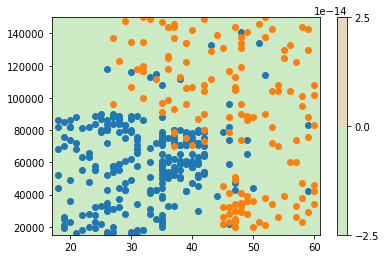

In [59]:
# plot the grid of x, y and z values as a surface
surface = plt.contourf(x_grid, y_grid, pp_pred, cmap='Pastel1')
plt.colorbar(surface)

# create scatter plot for samples from each class
for class_value in range(2):
# get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(x[row_ix, 0], x[row_ix, 1], cmap='Pastel1')
# show the plot
plt.show()


#NOT GOOD

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


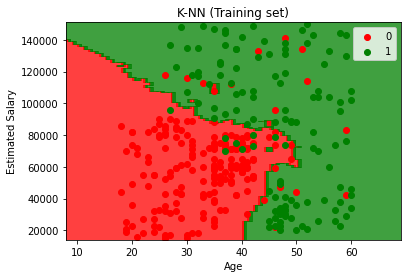

In [60]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(xtrain), ytrain
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
#ravel changes 2-D to 1-D likr .reshape(len(),1)
#alpha is for transparent background
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


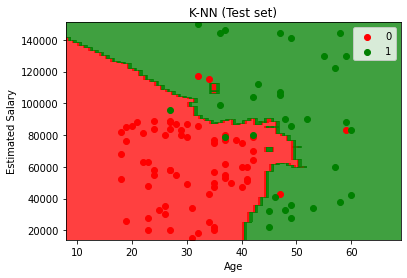

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()